In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import io
from google.colab import files

In [18]:

uploaded = files.upload()

Saving train.csv to train.csv


**Identify the correct filename**


In [19]:
print("Uploaded files:", uploaded.keys())


Uploaded files: dict_keys(['train.csv'])


**Read the correct file (update filename if necessary)**

In [20]:
filename = list(uploaded.keys())[0]  # Automatically gets the first uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Read the CSV file

In [21]:
print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sa

In [22]:
print("Columns in Dataset:", df.columns)

Columns in Dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara

**Select relevant features and target**

In [24]:
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]  # Square footage, Bedrooms, Bathrooms
target = "SalePrice"


**Handle missing values AND Split dataset into features (X) and target (y)**

In [26]:
df = df[features + [target]].dropna()
X = df[features]  # Independent variables
y = df[target]    # Dependent variable (house price)

**Split into training & testing sets (80% train, 20% test)**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train the Linear Regression model**

In [29]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

**Make predictions and Evaluate model performance**

In [31]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


**Print Evaluation Metrics**

In [32]:
print("\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



📊 Model Performance:
Mean Absolute Error (MAE): 35788.06
Mean Squared Error (MSE): 2806426667.25
Root Mean Squared Error (RMSE): 52975.72
R² Score: 0.6341


**Visualize Predictions**

**Scatter Plot: Actual vs Predicted Prices**

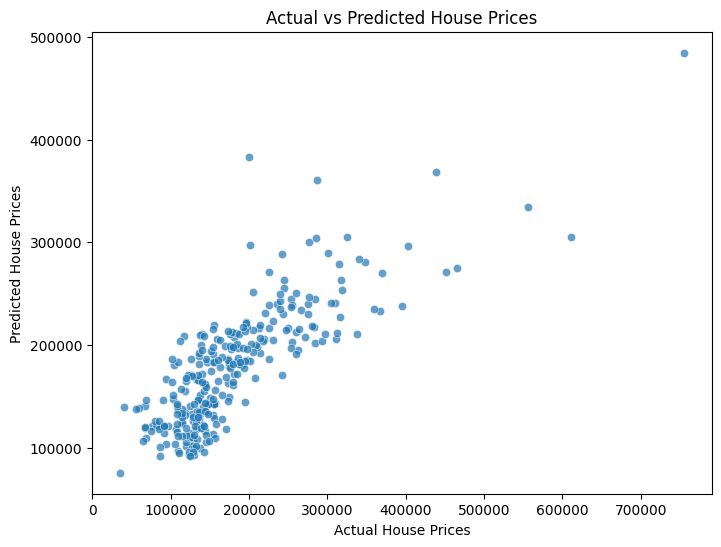

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

**Residual Plot: Errors in Prediction**

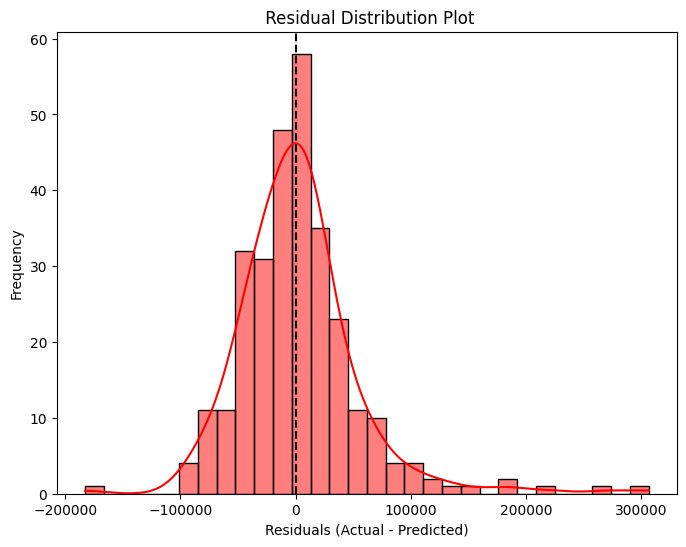

In [40]:
residuals = y_test - y_pred  # Calculate residuals (errors)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.axvline(0, color="black", linestyle="--")  # Reference line at zero error
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title(" Residual Distribution Plot")
plt.show()

**Distribution Plot: Actual vs Predicted Prices**

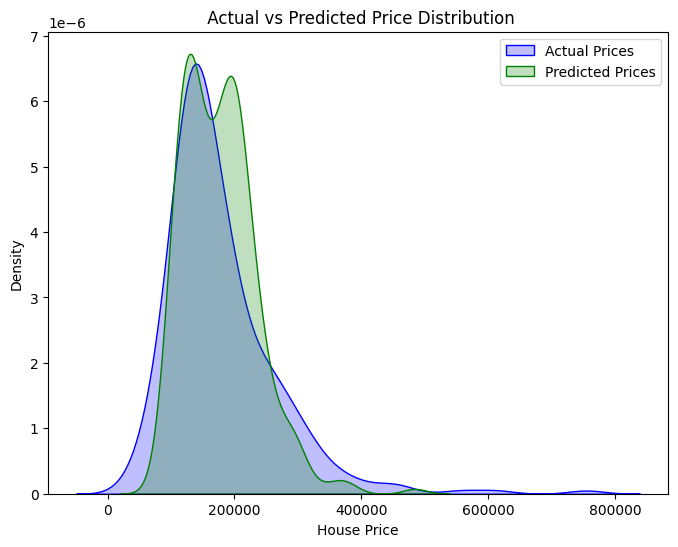

In [41]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Prices", color="blue", fill=True)
sns.kdeplot(y_pred, label="Predicted Prices", color="green", fill=True)
plt.xlabel("House Price")
plt.ylabel("Density")
plt.title(" Actual vs Predicted Price Distribution")
plt.legend()
plt.show()

**Feature Importance Bar Chart**

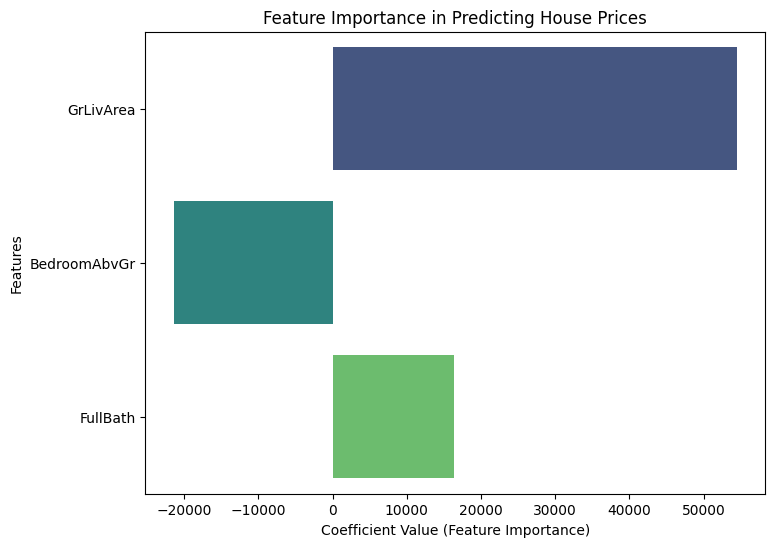

In [45]:
plt.figure(figsize=(8, 6))
sns.barplot(x=model.coef_, y=features, hue=features, palette="viridis", legend=False)
plt.xlabel("Coefficient Value (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting House Prices")
plt.show()


**Print Model Coefficients**

In [47]:
print("\n Feature Importance (Coefficients):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")


 Feature Importance (Coefficients):
GrLivArea: 54531.4367
BedroomAbvGr: -21444.3550
FullBath: 16408.1774


In [50]:
# Example Prediction for a New House
new_data = pd.DataFrame([[2000, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
# Ensure the new data is scaled using the same scaler
new_data_scaled = scaler.transform(new_data)
# Predict house price
predicted_price = model.predict(new_data_scaled)
# Print predicted price
print(f'\n🏠 Predicted price for a new house (2000 sqft, 3 beds, 2 baths): ${predicted_price[0]:,.2f}')



🏠 Predicted price for a new house (2000 sqft, 3 beds, 2 baths): $240,377.51


**By :Rishin Aiyappa AG:🧑‍💻**